In [1]:
import pandas as pd
import os

import subprocess
from statsmodels.stats.multitest import multipletests
from venny4py.venny4py import *

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [2]:
# wza_kendalltau_results_bio1.csv'
# wza_results_lfmm_bio1.csv

In [3]:
import pickle
dict_blocks = '../key_files/blocks_snpsid_dict.pkl'

with open(dict_blocks, 'rb') as file:
    dict_blocks = pickle.load(file)

reverse_mapping = {item: key for key, values in dict_blocks.items() for item in values}

In [4]:
biovars = [ 'bio1',
    'bio7',
 
 'bio13',
 'bio14',
 'bio4',
 'bio10',
 'bio17',
 'bio9',
 'bio3', 
 'bio15',
 'bio12',
 'bio18',
 'bio6',
 'bio2',
 'bio8',
 'bio16',
 'bio11',
 'bio5'] # 'bio19',

In [5]:
## gemma 
biovar = 'bio1'

In [6]:
len(biovars)
import seaborn as sns
sns.set_context("talk")

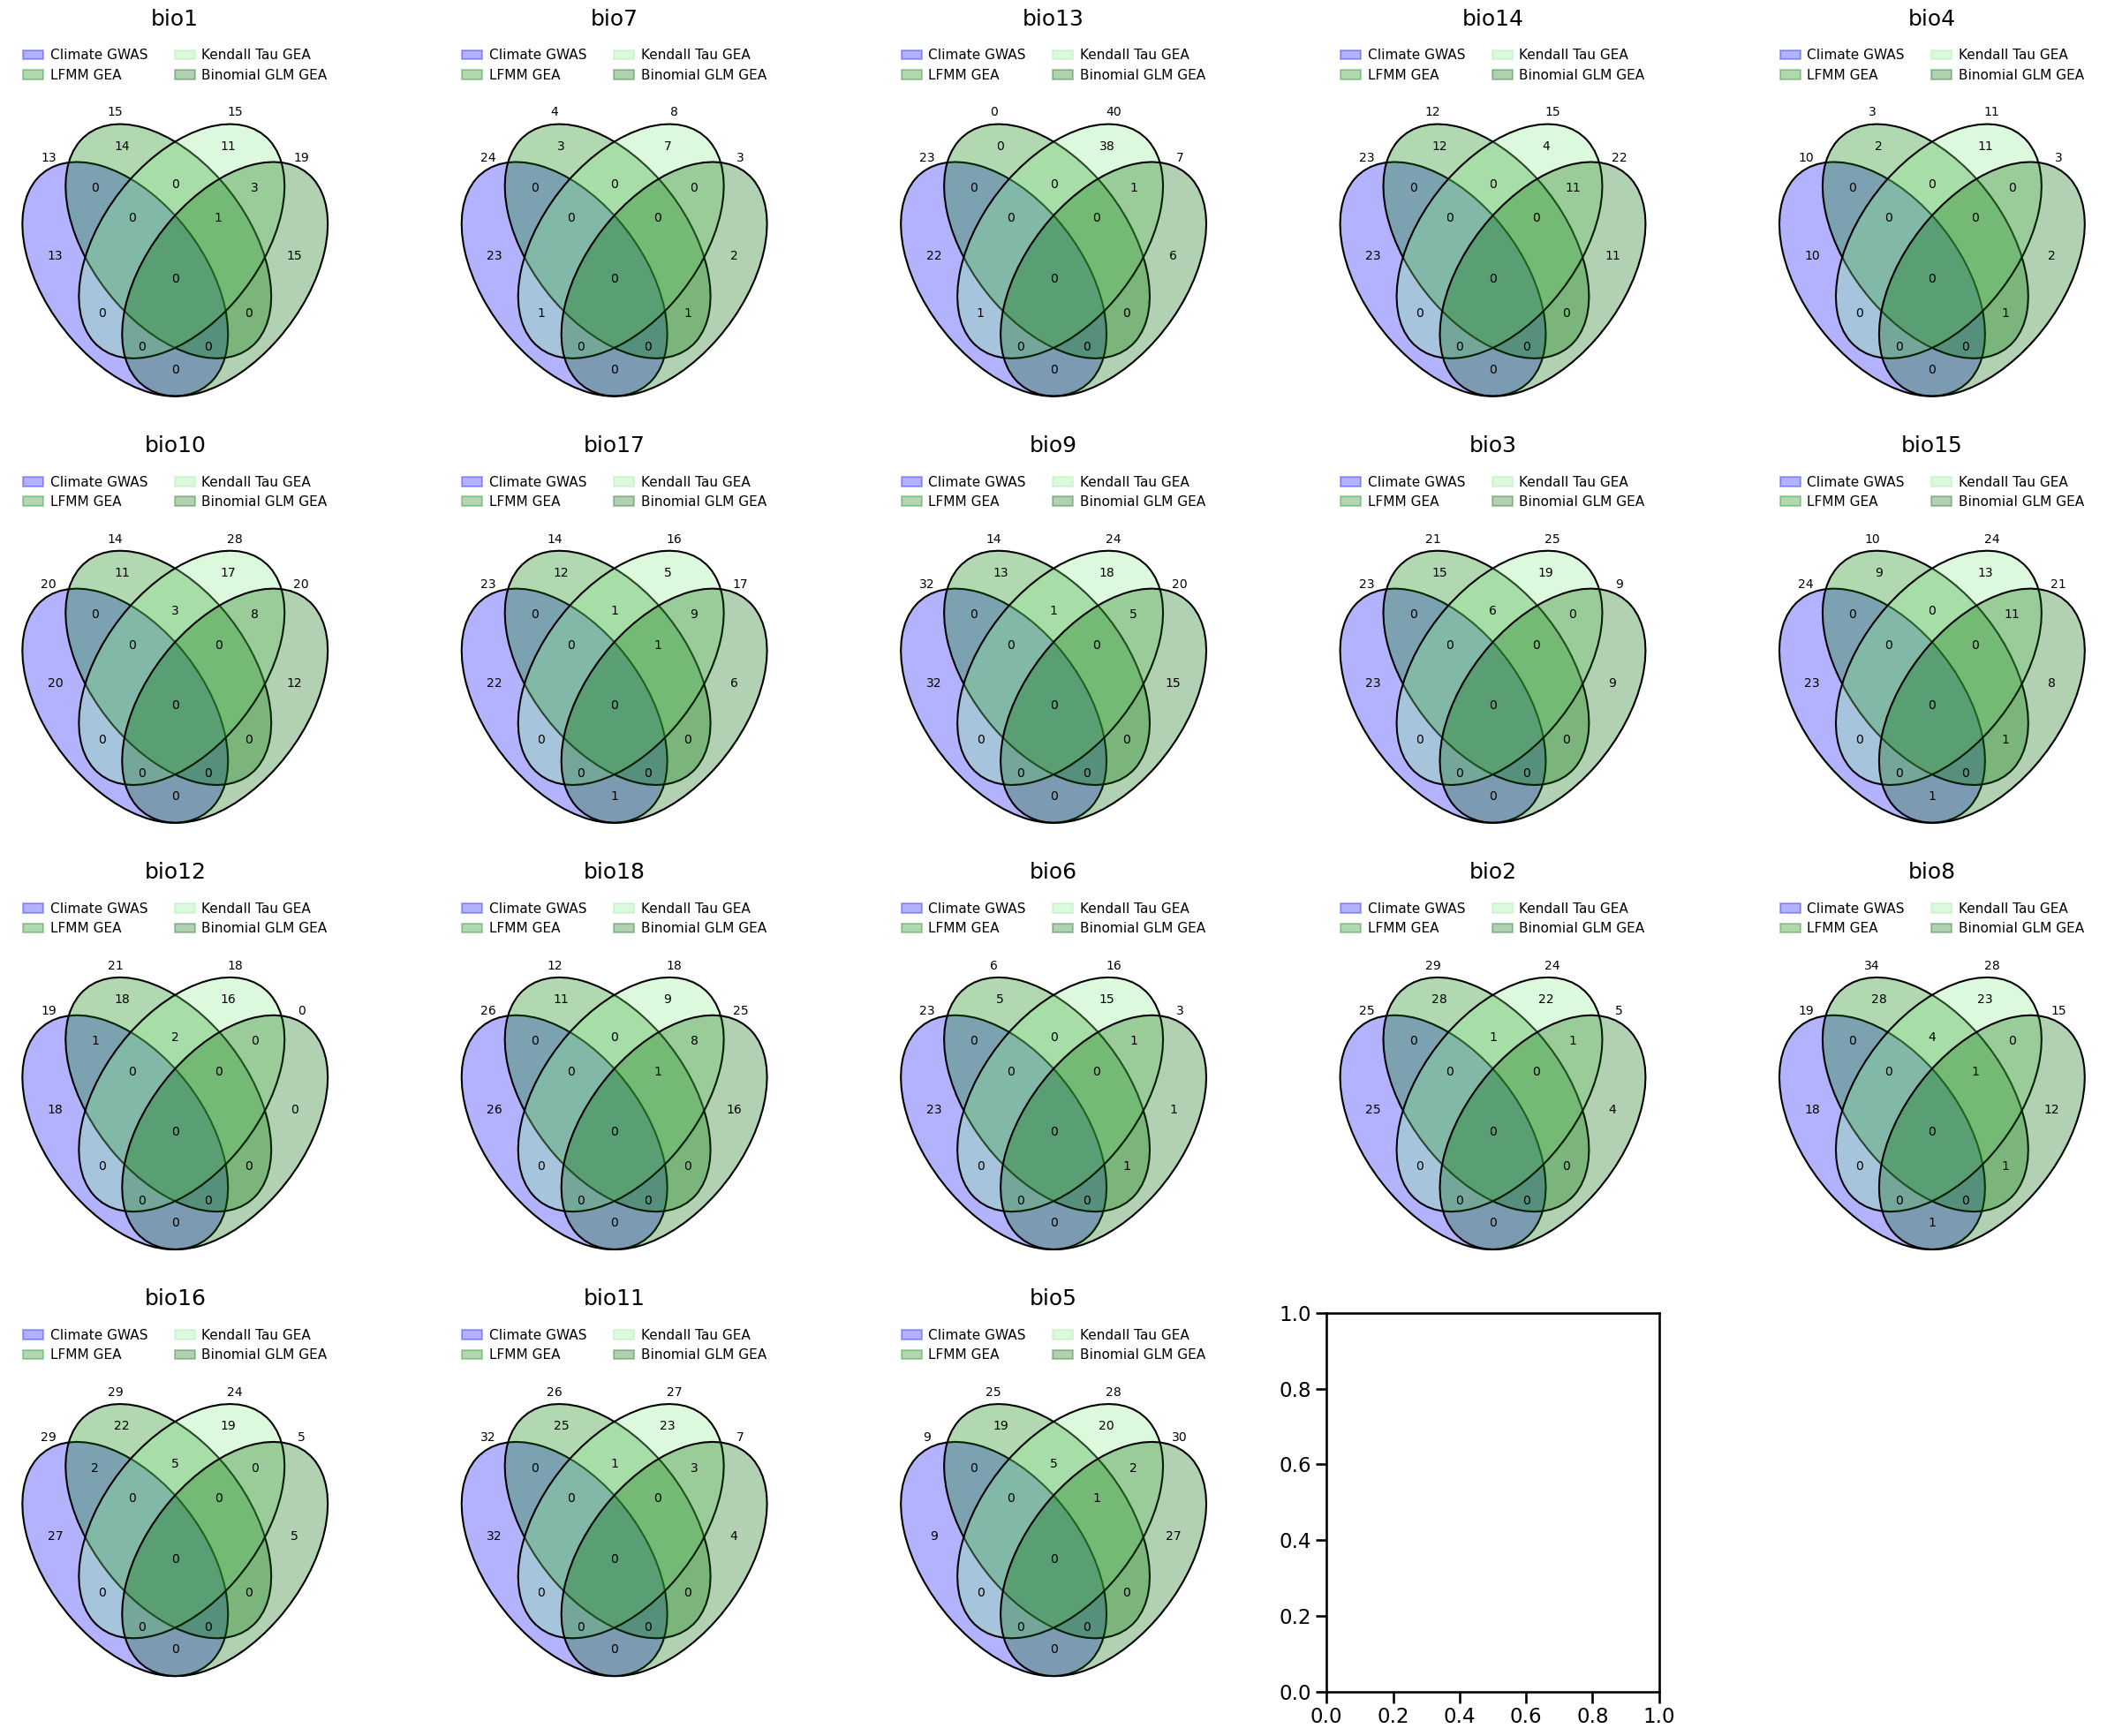

In [11]:
import pandas as pd
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
from venny4py.venny4py import venny4py

# List of biological variables you want to plot

# Setting up a grid of 4 rows and 5 columns
fig, axes = plt.subplots(4, 5, figsize=(25, 20))  # Adjust the figure size as needed
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust spacing between plots to prevent label overlap

# Define colors for the Venn diagrams
colors = ['blue', 'green', 'lightgreen', 'darkgreen']  # Example colors for the sets
# Define colors for the Venn diagrams
#gemma_color = 'blue'
#other_colors = ['green', 'lightgreen', 'darkgreen']
# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over biovars and plot each one in the appropriate subplot
for idx, biovar in enumerate(biovars):
    ax = axes[idx]
    ax.set_title(biovar)  # Set the title for each subplot

    path_gemma = f'../wza_last_gen/gemma_1001_wza_{biovar}.csv'
    gemma_result = pd.read_csv(path_gemma)
    gemma_result = gemma_result.rename(columns={'gene': 'block'})
    gemma_result['BH_corrected_p'] = multipletests(gemma_result['Z_pVal'], method='fdr_bh')[1]
    sign_wza_gemma = gemma_result[gemma_result['BH_corrected_p'] < 0.05]

    wza_lfmm = pd.read_csv(f'../wza_last_gen/wza_results_lfmm_{biovar}_poly7.csv')
    wza_lfmm = wza_lfmm.rename(columns={'gene': 'block'})
    wza_lfmm['BH_corrected_p'] = multipletests(wza_lfmm['Z_pVal'], method='fdr_bh')[1]
    sign_wza_lfmm = wza_lfmm[wza_lfmm['BH_corrected_p'] < 0.05]

    wza_kendall = pd.read_csv(f'../wza_last_gen/wza_kendalltau_results_{biovar}_poly7.csv')
    wza_kendall['BH_corrected_p'] = multipletests(wza_kendall['Z_pVal'], method='fdr_bh')[1]
    sign_wza_kendall = wza_kendall[wza_kendall['BH_corrected_p'] < 0.05]
    sign_wza_kendall = sign_wza_kendall.rename(columns={'gene': 'block'})

    binomial_reg = pd.read_csv(f'../wza_last_gen/wza_binomial_regression_{biovar}_poly7.csv')
    binomial_reg['BH_corrected_p'] = multipletests(binomial_reg['Z_pVal'], method='fdr_bh')[1]
    sign_binomial_reg = binomial_reg[binomial_reg['BH_corrected_p'] < 0.05]
    sign_binomial_reg = sign_binomial_reg.rename(columns={'gene': 'block'})

    sets = {
        'Climate GWAS': set(sign_wza_gemma['block']), 
        'LFMM GEA': set(sign_wza_lfmm['block']), 
        'Kendall Tau GEA': set(sign_wza_kendall['block']), 
        'Binomial GLM GEA': set(sign_binomial_reg['block'])
    }

    # Use venny4py to visualize the overlap, specifying the subplot axis and customizing appearance
    venny4py(sets=sets, asax=ax, colors=colors, line_width=1.5, font_size=10, legend_cols=2, column_spacing=2)

# Hide the last subplot if it's unused
axes[19].axis('off')  # This hides the 20th subplot

# Adjust layout and display the overall figure
plt.tight_layout()
#plt.savefig('overlap_gea_gemma_last_gen.png')
#plt.savefig('overlap_gea_gemma_last_gen.pdf')

plt.show()


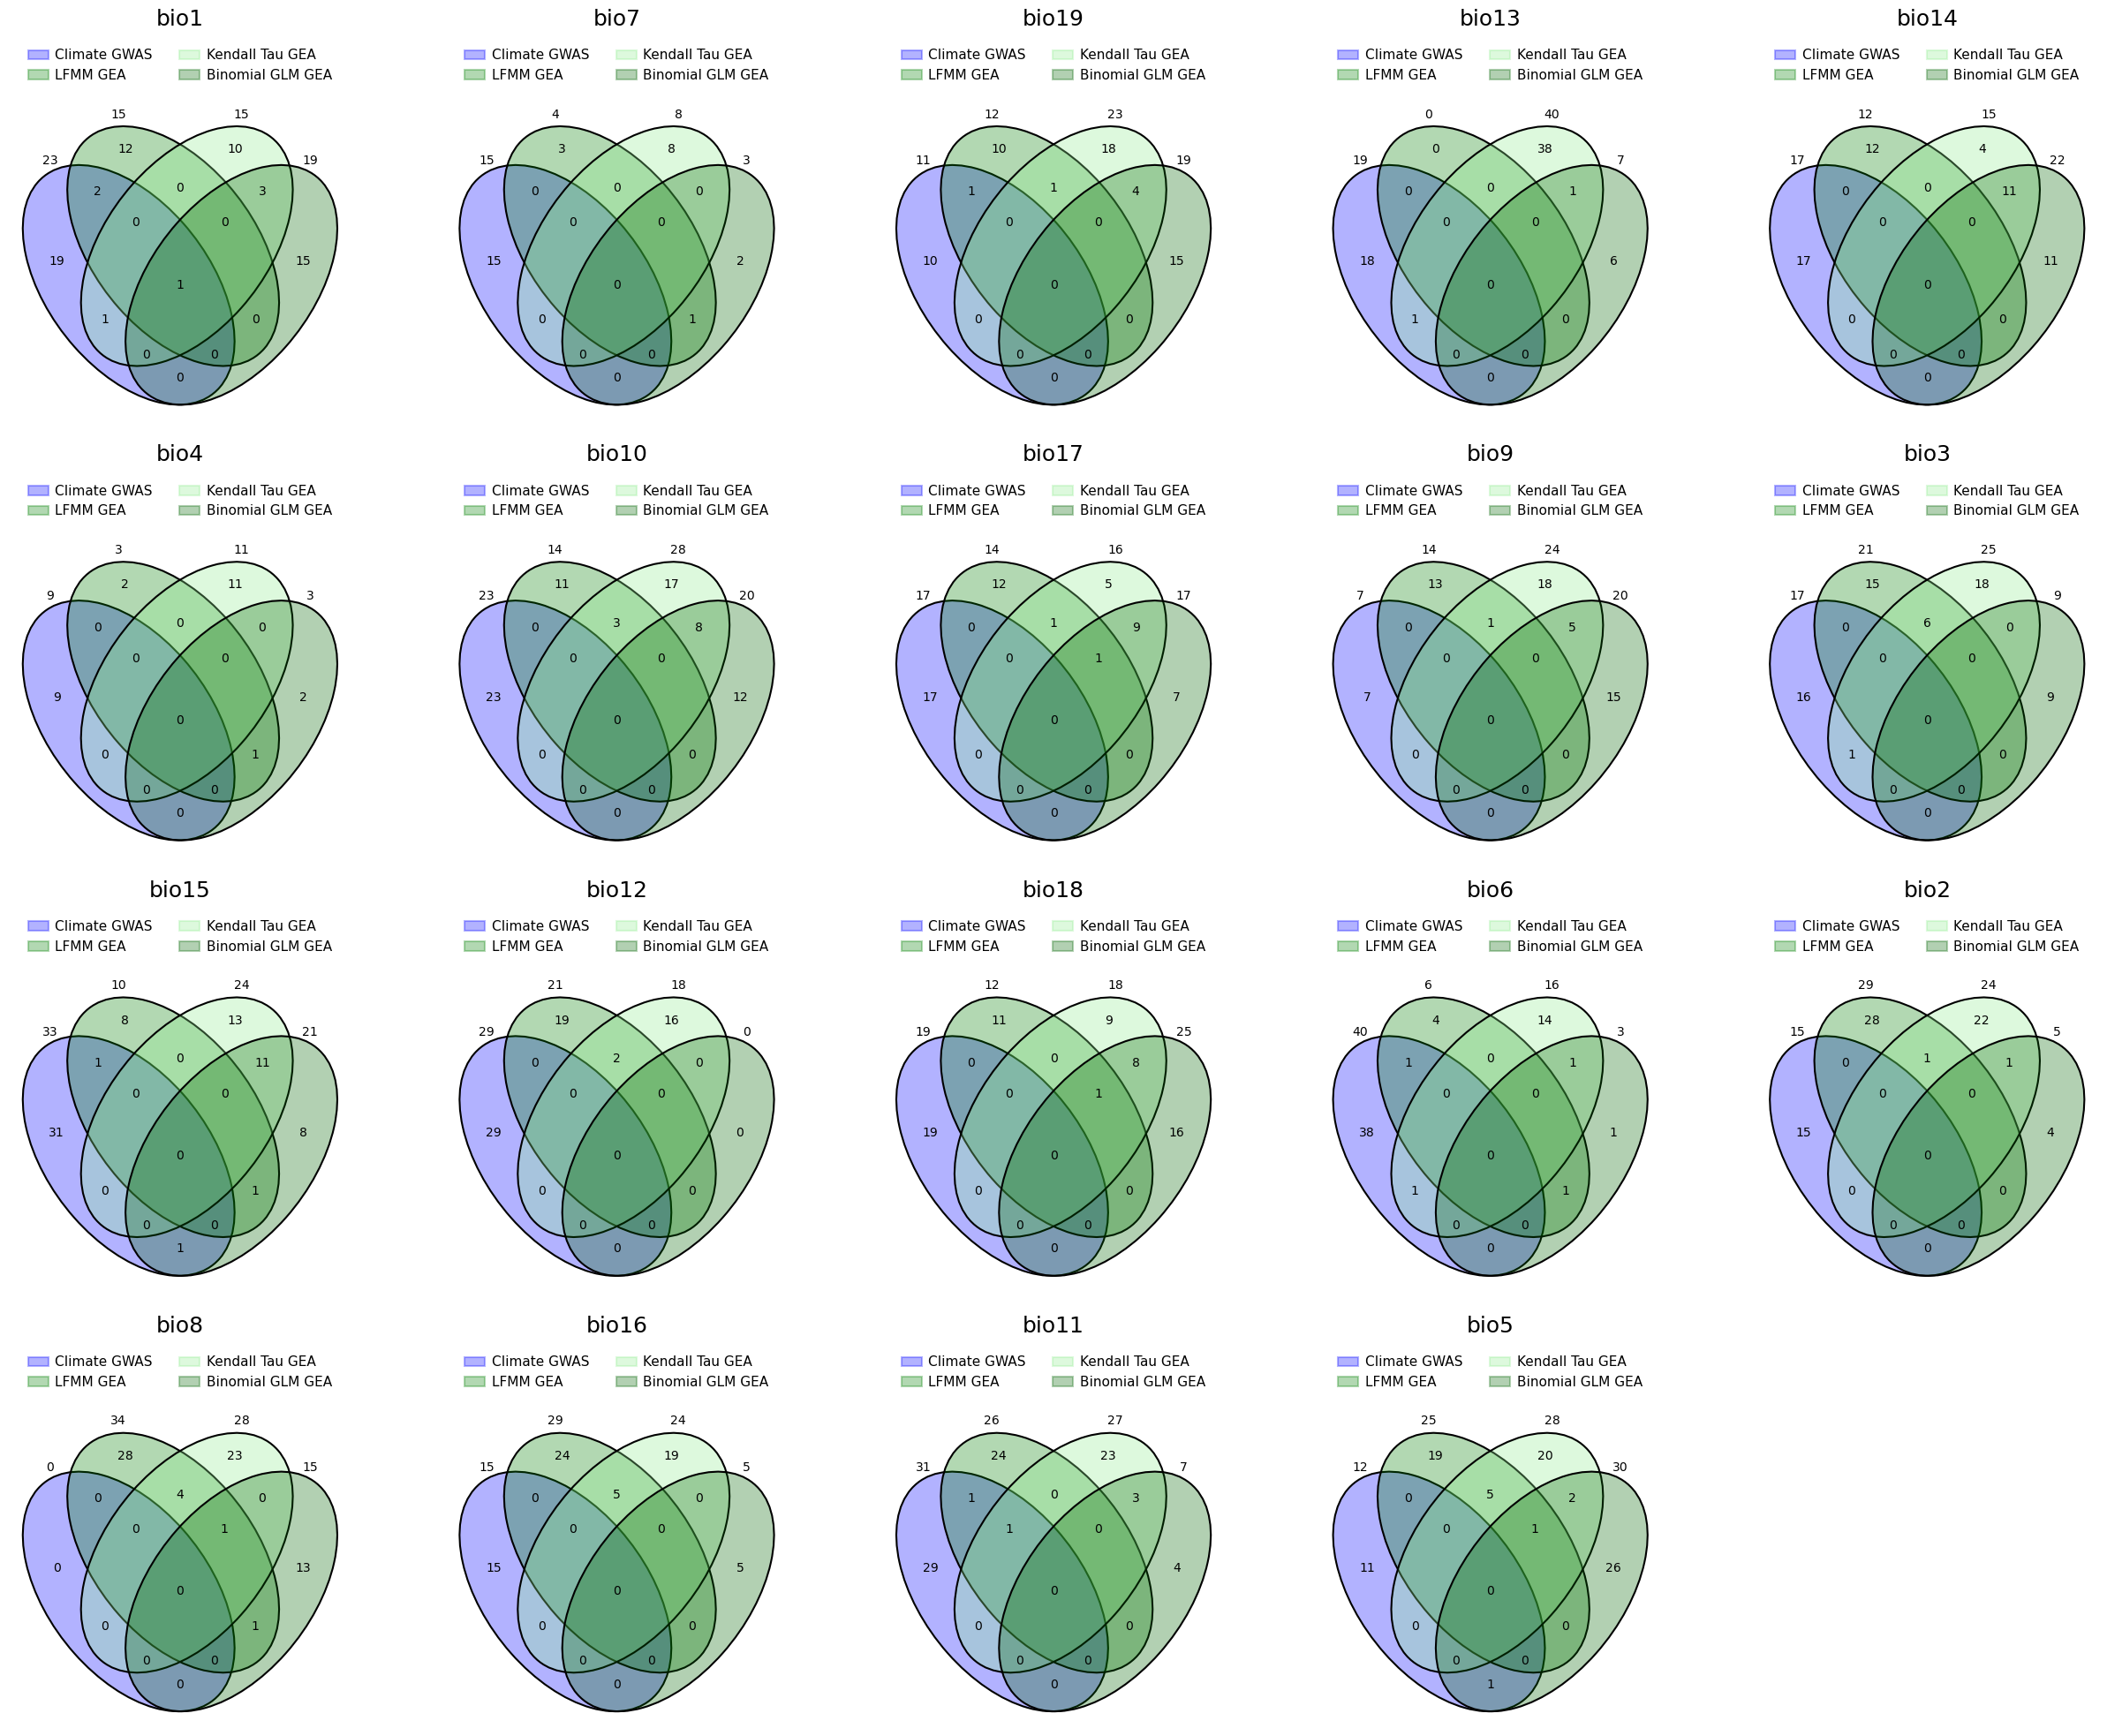

In [7]:
import pandas as pd
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
from venny4py.venny4py import venny4py

# List of biological variables you want to plot

# Setting up a grid of 4 rows and 5 columns
fig, axes = plt.subplots(4, 5, figsize=(25, 20))  # Adjust the figure size as needed
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust spacing between plots to prevent label overlap

# Define colors for the Venn diagrams
colors = ['blue', 'green', 'lightgreen', 'darkgreen']  # Example colors for the sets
# Define colors for the Venn diagrams
#gemma_color = 'blue'
#other_colors = ['green', 'lightgreen', 'darkgreen']
# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over biovars and plot each one in the appropriate subplot
for idx, biovar in enumerate(biovars):
    ax = axes[idx]
    ax.set_title(biovar)  # Set the title for each subplot

    path_gemma = f'../wza_last_gen/gemma_231_wza_{biovar}.csv'
    gemma_result = pd.read_csv(path_gemma)
    gemma_result = gemma_result.rename(columns={'gene': 'block'})
    gemma_result['BH_corrected_p'] = multipletests(gemma_result['Z_pVal'], method='fdr_bh')[1]
    sign_wza_gemma = gemma_result[gemma_result['BH_corrected_p'] < 0.05]

    wza_lfmm = pd.read_csv(f'../wza_last_gen/wza_results_lfmm_{biovar}_poly7.csv')
    wza_lfmm = wza_lfmm.rename(columns={'gene': 'block'})
    wza_lfmm['BH_corrected_p'] = multipletests(wza_lfmm['Z_pVal'], method='fdr_bh')[1]
    sign_wza_lfmm = wza_lfmm[wza_lfmm['BH_corrected_p'] < 0.05]

    wza_kendall = pd.read_csv(f'../wza_last_gen/wza_kendalltau_results_{biovar}_poly7.csv')
    wza_kendall['BH_corrected_p'] = multipletests(wza_kendall['Z_pVal'], method='fdr_bh')[1]
    sign_wza_kendall = wza_kendall[wza_kendall['BH_corrected_p'] < 0.05]
    sign_wza_kendall = sign_wza_kendall.rename(columns={'gene': 'block'})

    binomial_reg = pd.read_csv(f'../wza_last_gen/wza_binomial_regression_{biovar}_poly7.csv')
    binomial_reg['BH_corrected_p'] = multipletests(binomial_reg['Z_pVal'], method='fdr_bh')[1]
    sign_binomial_reg = binomial_reg[binomial_reg['BH_corrected_p'] < 0.05]
    sign_binomial_reg = sign_binomial_reg.rename(columns={'gene': 'block'})

    sets = {
        'Climate GWAS': set(sign_wza_gemma['block']), 
        'LFMM GEA': set(sign_wza_lfmm['block']), 
        'Kendall Tau GEA': set(sign_wza_kendall['block']), 
        'Binomial GLM GEA': set(sign_binomial_reg['block'])
    }

    # Use venny4py to visualize the overlap, specifying the subplot axis and customizing appearance
    venny4py(sets=sets, asax=ax, colors=colors, line_width=1.5, font_size=10, legend_cols=2, column_spacing=2)

# Hide the last subplot if it's unused
axes[19].axis('off')  # This hides the 20th subplot

# Adjust layout and display the overall figure
plt.tight_layout()
plt.savefig('overlap_gea_gemma_last_gen.png')
plt.savefig('overlap_gea_gemma_last_gen.pdf')

plt.show()


In [40]:
import pandas as pd
from statsmodels.stats.multitest import multipletests

# Assuming 'biovars' is defined
results = []
blocks_overlap = {}

for biovar in biovars:
    # Load GEMMA results
    path_gemma = f'../wza_last_gen/gemma_231_wza_{biovar}.csv'
    gemma_result = pd.read_csv(path_gemma)
    gemma_result = gemma_result.rename(columns={'gene': 'block'})
    gemma_result['BH_corrected_p'] = multipletests(gemma_result['Z_pVal'], method='fdr_bh')[1]
    sign_wza_gemma = set(gemma_result[gemma_result['BH_corrected_p'] < 0.05]['block'])

    # Load LFMM results
    wza_lfmm = pd.read_csv(f'../wza_last_gen/wza_results_lfmm_{biovar}_poly7.csv')
    wza_lfmm = wza_lfmm.rename(columns={'gene': 'block'})
    wza_lfmm['BH_corrected_p'] = multipletests(wza_lfmm['Z_pVal'], method='fdr_bh')[1]
    sign_wza_lfmm = set(wza_lfmm[wza_lfmm['BH_corrected_p'] < 0.05]['block'])

    # Load Kendall results
    wza_kendall = pd.read_csv(f'../wza_last_gen/wza_kendalltau_results_{biovar}_poly7.csv')
    wza_kendall = wza_kendall.rename(columns={'gene': 'block'})

    wza_kendall['BH_corrected_p'] = multipletests(wza_kendall['Z_pVal'], method='fdr_bh')[1]
    sign_wza_kendall = set(wza_kendall[wza_kendall['BH_corrected_p'] < 0.05]['block'])

    # Load Binomial Regression results
    binomial_reg = pd.read_csv(f'../wza_last_gen/wza_binomial_regression_{biovar}_poly7.csv')
    binomial_reg = binomial_reg.rename(columns={'gene': 'block'})

    binomial_reg['BH_corrected_p'] = multipletests(binomial_reg['Z_pVal'], method='fdr_bh')[1]
    sign_binomial_reg = set(binomial_reg[binomial_reg['BH_corrected_p'] < 0.05]['block'])

    # Calculate intersections
    pairwise_and_overall = {
        'biovar': biovar,
        'GEMMA_LFMM': len(sign_wza_gemma & sign_wza_lfmm),
        'GEMMA_Kendall': len(sign_wza_gemma & sign_wza_kendall),
        'GEMMA_Binomial': len(sign_wza_gemma & sign_binomial_reg),
        'LFMM_Kendall': len(sign_wza_lfmm & sign_wza_kendall),
        'LFMM_Binomial': len(sign_wza_lfmm & sign_binomial_reg),
        'Kendall_Binomial': len(sign_wza_kendall & sign_binomial_reg),
        'All_Intersect': len(sign_wza_gemma & sign_wza_lfmm & sign_wza_kendall & sign_binomial_reg)
    }

    blocks_overlap[biovar] = [sign_wza_gemma & sign_wza_lfmm,
    sign_wza_gemma & sign_wza_kendall,
    sign_wza_gemma & sign_binomial_reg,
    sign_wza_lfmm & sign_wza_kendall,
    sign_wza_lfmm & sign_binomial_reg,
    sign_wza_kendall & sign_binomial_reg,
    sign_wza_gemma & sign_wza_lfmm & sign_wza_kendall & sign_binomial_reg]
    

    # Append results for each biovar
    results.append(pairwise_and_overall)

# Convert results to DataFrame
results_df_231 = pd.DataFrame(results)


In [41]:
blocks_overlap = pd.DataFrame(blocks_overlap).T.reset_index()

In [42]:
blocks_overlap.columns = ['biovar', 'GEMMA_LFMM', 'GEMMA_Kendall', 'GEMMA_Binomial', 'LFMM_Kendall', 'LFMM_Binomial',
                         'Kendall_Binomial', 'All_Intersect']

In [43]:
blocks_overlap

,biovar,GEMMA_LFMM,GEMMA_Kendall,GEMMA_Binomial,LFMM_Kendall,LFMM_Binomial,Kendall_Binomial,All_Intersect
0,bio1,"{2_199, 4_2320, 2_1265}","{2_1265, 3_2941}",{2_1265},{2_1265},{2_1265},"{5_2391, 1_1113, 2_1265, 4_2756}",{2_1265}
1,bio7,{},{},{},{},{3_1091},{},{}
2,bio13,{},{2_1698},{},{},{},{4_2077},{}
3,bio14,{},{},{},{},{},"{1_230, 4_2115, 4_1950, 1_1113, 4_3051, 2_723,...",{}
4,bio4,{},{},{},{},{3_1091},{},{}
5,bio10,{},{},{},"{1_697, 2_1676, 4_494}",{},"{5_687, 4_1950, 1_1113, 5_2295, 4_3051, 4_127,...",{}
6,bio17,{},{},{},"{1_2865, 5_1017}",{1_2865},"{1_230, 4_2115, 4_1950, 1_1113, 4_3051, 5_758,...",{}
7,bio9,{},{},{},{2_788},{},"{4_1343, 1_1113, 4_3051, 4_2756, 5_707}",{}
8,bio3,{},{5_1065},{},"{4_157, 2_148, 2_1824, 1_2667, 4_1681, 1_494}",{},{},{}
9,bio15,{1_1436},{},{4_937},{},{5_675},"{4_2115, 4_2096, 4_1950, 1_1113, 5_2295, 4_127...",{}


In [26]:
# Function to convert block IDs to genomic regions
def convert_to_regions(block_set):
    regions = set()
    for block_id in block_set:
        if block_id in dict_blocks:
            start_end = dict_blocks[block_id]
            region = f"{start_end[0].split('_')[0]}:{start_end[0].split('_')[1]}-{start_end[1].split('_')[1]}"
            regions.add(region)
    return regions

# Apply the function to each cell in the DataFrame
for column in blocks_overlap.columns[1:]:  # Skip the first column ('biovar')
    blocks_overlap[column] = blocks_overlap[column].apply(convert_to_regions)

In [28]:
blocks_overlap.to_csv('all_intersections_gea_gwas231_last_gen_block_regions.csv')

In [44]:
blocks_overlap

,biovar,GEMMA_LFMM,GEMMA_Kendall,GEMMA_Binomial,LFMM_Kendall,LFMM_Binomial,Kendall_Binomial,All_Intersect
0,bio1,"{2_199, 4_2320, 2_1265}","{2_1265, 3_2941}",{2_1265},{2_1265},{2_1265},"{5_2391, 1_1113, 2_1265, 4_2756}",{2_1265}
1,bio7,{},{},{},{},{3_1091},{},{}
2,bio13,{},{2_1698},{},{},{},{4_2077},{}
3,bio14,{},{},{},{},{},"{1_230, 4_2115, 4_1950, 1_1113, 4_3051, 2_723,...",{}
4,bio4,{},{},{},{},{3_1091},{},{}
5,bio10,{},{},{},"{1_697, 2_1676, 4_494}",{},"{5_687, 4_1950, 1_1113, 5_2295, 4_3051, 4_127,...",{}
6,bio17,{},{},{},"{1_2865, 5_1017}",{1_2865},"{1_230, 4_2115, 4_1950, 1_1113, 4_3051, 5_758,...",{}
7,bio9,{},{},{},{2_788},{},"{4_1343, 1_1113, 4_3051, 4_2756, 5_707}",{}
8,bio3,{},{5_1065},{},"{4_157, 2_148, 2_1824, 1_2667, 4_1681, 1_494}",{},{},{}
9,bio15,{1_1436},{},{4_937},{},{5_675},"{4_2115, 4_2096, 4_1950, 1_1113, 5_2295, 4_127...",{}


In [45]:
melted_df = pd.melt(blocks_overlap, id_vars='biovar', var_name='comparision', value_name='block_shared')

In [46]:
melted_df

,biovar,comparision,block_shared
0,bio1,GEMMA_LFMM,"{2_199, 4_2320, 2_1265}"
1,bio7,GEMMA_LFMM,{}
2,bio13,GEMMA_LFMM,{}
3,bio14,GEMMA_LFMM,{}
4,bio4,GEMMA_LFMM,{}
...,...,...,...
121,bio2,All_Intersect,{}
122,bio8,All_Intersect,{}
123,bio16,All_Intersect,{}
124,bio11,All_Intersect,{}


In [49]:
# Melting the DataFrame

# Since the values in 'Genomic_Region' are sets, we need to explode them into separate rows
melted_df = melted_df.explode('block_shared')

In [51]:
melted_df = melted_df.dropna()

In [53]:
melted_df.to_csv('all_intersections_gea_gwas231_last_gen_blocks.csv',index=None)

In [15]:
results_df_231.to_csv('all_intersections_gea_gwas231_last_gen.csv',index=None)

In [7]:
import pandas as pd
from statsmodels.stats.multitest import multipletests

# Assuming 'biovars' is defined
results = []

for biovar in biovars:
    # Load GEMMA results
    path_gemma = f'../wza_last_gen/gemma_1001_wza_{biovar}.csv'
    gemma_result = pd.read_csv(path_gemma)
    gemma_result = gemma_result.rename(columns={'gene': 'block'})
    gemma_result['BH_corrected_p'] = multipletests(gemma_result['Z_pVal'], method='fdr_bh')[1]
    sign_wza_gemma = set(gemma_result[gemma_result['BH_corrected_p'] < 0.05]['block'])

    # Load LFMM results
    wza_lfmm = pd.read_csv(f'../wza_last_gen/wza_results_lfmm_{biovar}_poly7.csv')
    wza_lfmm = wza_lfmm.rename(columns={'gene': 'block'})
    wza_lfmm['BH_corrected_p'] = multipletests(wza_lfmm['Z_pVal'], method='fdr_bh')[1]
    sign_wza_lfmm = set(wza_lfmm[wza_lfmm['BH_corrected_p'] < 0.05]['block'])

    # Load Kendall results
    wza_kendall = pd.read_csv(f'../wza_last_gen/wza_kendalltau_results_{biovar}_poly7.csv')
    wza_kendall = wza_kendall.rename(columns={'gene': 'block'})

    wza_kendall['BH_corrected_p'] = multipletests(wza_kendall['Z_pVal'], method='fdr_bh')[1]
    sign_wza_kendall = set(wza_kendall[wza_kendall['BH_corrected_p'] < 0.05]['block'])

    # Load Binomial Regression results
    binomial_reg = pd.read_csv(f'../wza_last_gen/wza_binomial_regression_{biovar}_poly7.csv')
    binomial_reg = binomial_reg.rename(columns={'gene': 'block'})

    binomial_reg['BH_corrected_p'] = multipletests(binomial_reg['Z_pVal'], method='fdr_bh')[1]
    sign_binomial_reg = set(binomial_reg[binomial_reg['BH_corrected_p'] < 0.05]['block'])

    # Calculate intersections
    pairwise_and_overall = {
        'biovar': biovar,
        'GEMMA_LFMM': len(sign_wza_gemma & sign_wza_lfmm),
        'GEMMA_Kendall': len(sign_wza_gemma & sign_wza_kendall),
        'GEMMA_Binomial': len(sign_wza_gemma & sign_binomial_reg),
        'LFMM_Kendall': len(sign_wza_lfmm & sign_wza_kendall),
        'LFMM_Binomial': len(sign_wza_lfmm & sign_binomial_reg),
        'Kendall_Binomial': len(sign_wza_kendall & sign_binomial_reg),
        'All_Intersect': len(sign_wza_gemma & sign_wza_lfmm & sign_wza_kendall & sign_binomial_reg)
    }

    # Append results for each biovar
    results.append(pairwise_and_overall)

# Convert results to DataFrame
results_df_1001 = pd.DataFrame(results)


In [8]:
results_df_1001

,biovar,GEMMA_LFMM,GEMMA_Kendall,GEMMA_Binomial,LFMM_Kendall,LFMM_Binomial,Kendall_Binomial,All_Intersect
0,bio1,0,0,0,1,1,4,0
1,bio7,0,1,0,0,1,0,0
2,bio13,0,1,0,0,0,1,0
3,bio14,0,0,0,0,0,11,0
4,bio4,0,0,0,0,1,0,0
5,bio10,0,0,0,3,0,8,0
6,bio17,0,0,1,2,1,10,0
7,bio9,0,0,0,1,0,5,0
8,bio3,0,0,0,6,0,0,0
9,bio15,0,0,1,0,1,11,0


In [18]:
results_df_1001.to_csv('all_intersections_gea_gwas1001_last_gen.csv',index=None)

In [ ]:
    gemma_result.loc[gemma_result['BH_corrected_p'] < 0.05, 'significant'] = True
    
    merged_df = pd.merge(gemma_result, lfmm_result, on = 'block')
    
    # Define significance conditions
    both_significant = merged_df['significant_x'] & merged_df['significant_y']
    print(merged_df[both_significant])
    neither_significant = ~merged_df['significant_x'] & ~merged_df['significant_y']
    only_gemma_significant = merged_df['significant_x'] & ~merged_df['significant_y']
    only_lfmm_significant = ~merged_df['significant_x'] & merged_df['significant_y']
    
    # Count SNPs in each category
    both_count = both_significant.sum()
    neither_count = neither_significant.sum()
    only_gemma_count = only_gemma_significant.sum()
    only_lfmm_count = only_lfmm_significant.sum()

    results[biovar] = [both_count,neither_count, only_gemma_count, only_lfmm_count]

In [75]:
index = pd.MultiIndex.from_tuples(counts.keys(), names=['GEMMA+WZA', 'LFMM+WZA', 'KendallTau+WZA', 'BinomialReg+WZA'])
data = pd.Series(counts, index=index)

In [76]:
data

GEMMA+WZA  LFMM+WZA  KendallTau+WZA  BinomialReg+WZA
True       False     False           False              23
False      True      False           False              15
           False     True            False              15
                     False           True               19
True       True      False           False               3
           False     True            False               2
                     False           True                1
False      True      True            False               1
                     False           True                1
           False     True            True                4
True       True      True            True                1
dtype: int64

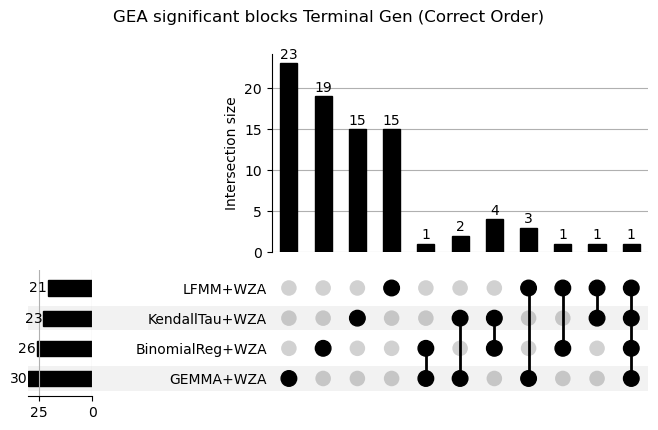

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import plot

# Define your counts as given
counts = {
    (True, False, False, False): 23,  # Only in set1
    (False, True, False, False): 15,  # Only in set2
    (False, False, True, False): 15,  # Only in set3
    (False, False, False, True): 19,  # Only in set4
    (True, True, False, False): 3,    # In set1 and set2 only
    (True, False, True, False): 2,    # In set1 and set3 only
    (True, False, False, True): 1,    # In set1 and set4 only
    (False, True, True, False): 1,    # In set2 and set3 only
    (False, True, False, True): 1,    # In set2 and set4 only
    (False, False, True, True): 4,    # In set3 and set4 only
    (True, True, True, True): 1       # In all sets
}

# Convert the dictionary to a pandas Series with a MultiIndex
index = pd.MultiIndex.from_tuples(counts.keys(), names=['GEMMA+WZA', 'LFMM+WZA', 'KendallTau+WZA', 'BinomialReg+WZA'])
data = pd.Series(counts, index=index)

# Manually sort the MultiIndex based on your specific order
sorted_order = [
    (True, False, False, False),
    (False, True, False, False),
    (False, False, True, False),
    (False, False, False, True),
    (True, True, False, False),
    (True, False, True, False),
    (True, False, False, True),
    (False, True, True, False),
    (False, True, False, True),
    (False, False, True, True),
    (True, True, True, True)
]

# Reorder the data Series according to sorted_order
data = data.reindex(sorted_order)

# Plot using upsetplot
plot(data, show_counts=True)
plt.suptitle("GEA significant blocks Terminal Gen (Correct Order)")
plt.show()


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import from_contents, plot

# Define the sets
set1 = set(sign_wza_gemma['block'])
set2 = set(sign_wza_lfmm['block'])
set3 = set(sign_wza_kendall['block'])
set4 = set(sign_binomial_reg['block'])

# Generate the data for the UpSet plot
data = {
    'GEMMA+WZA': set1,
    'LFMM+WZA': set2,
    'KendallTau+WZA': set3,
    'BinomialReg+WZA': set4
}

# Prepare the counts data using from_contents function
counts = from_contents(data)

# Define the specific combinations you want to show
desired_combinations = {
    (True, False, False, False),  # Only in set1
    (False, True, False, False),  # Only in set2
    (False, False, True, False),  # Only in set3
    (False, False, False, True),  # Only in set4
    (True, True, False, False),   # In set1 and set2 only
    (True, False, True, False),   # In set1 and set3 only
    (True, False, False, True),   # In set1 and set4 only
    (False, True, True, False),   # In set2 and set3 only
    (False, True, False, True),   # In set2 and set4 only
    (False, False, True, True),   # In set3 and set4 only
    (True, True, True, True)      # In all sets
}

# Filter the counts to only include the desired combinations
filtered_counts = counts.loc[desired_combinations]

# Plot using upsetplot
plot(filtered_counts, show_counts=True)
plt.suptitle("GEA significant blocks Terminal Gen (Selected Intersections)")
plt.show()


TypeError: Passing a set as an indexer is not supported. Use a list instead.

In [65]:
counts

id
GEMMA+WZA LFMM+WZA KendallTau+WZA BinomialReg+WZA        
True      False    False          False            4_2754
                                  False            3_2128
                                  False            5_1915
                                  False             5_964
                                  False             2_198
...                                                   ...
False     False    False          True             1_3564
                                  True              5_687
                                  True             4_1343
                                  True             1_2249
                                  True             4_2096

[63 rows x 1 columns]

In [63]:
len(set1.intersection(set2))

3

In [48]:
set1.intersection(set4)

{'2_1265'}

In [22]:
#sign_linages_wza_picmin = sign_linages_wza_picmin[sign_linages_wza_picmin['n_est'] > 3]

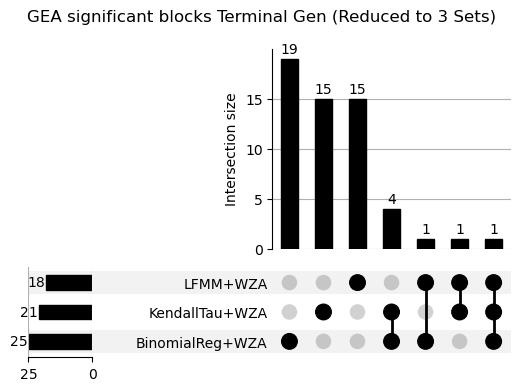

In [28]:
# Extract 'block' columns and convert to sets (excluding set1/picmin)
set2 = set(sign_wza_lfmm['block'])
set3 = set(sign_wza_kendall['block'])
set4 = set(sign_binomial_reg['block'])

# Calculate the unions using set operations
counts = {
    (True, False, False): len(set2) ,  # Only in set2
    (False, True, False): len(set3),  # Only in set3
    (False, False, True): len(set4),  # Only in set4
    (True, True, False): len(set2.intersection(set3)),  # In set2 and set3 only
    (True, False, True): len(set2.intersection(set4)),  # In set2 and set4 only
    (False, True, True): len(set3.intersection(set4)),  # In set3 and set4 only
    (True, True, True): len(set2.intersection(set3).intersection(set4))  # In set2, set3, and set4
}

# Convert the dictionary to a pandas Series with a MultiIndex
index = pd.MultiIndex.from_tuples(counts.keys(), names=['LFMM+WZA', 'KendallTau+WZA', 'BinomialReg+WZA'])
data = pd.Series(counts, index=index)

# Plot the data
plot(data, show_counts=True)
plt.suptitle("GEA significant blocks Terminal Gen (Reduced to 3 Sets)")
plt.show()


In [38]:
data.reset_index

,LFMM+WZA,KendallTau+WZA,BinomialReg+WZA,0
0,True,False,False,15
1,False,True,False,15
2,False,False,True,19
3,True,True,False,1
4,True,False,True,1
5,False,True,True,4
6,True,True,True,1


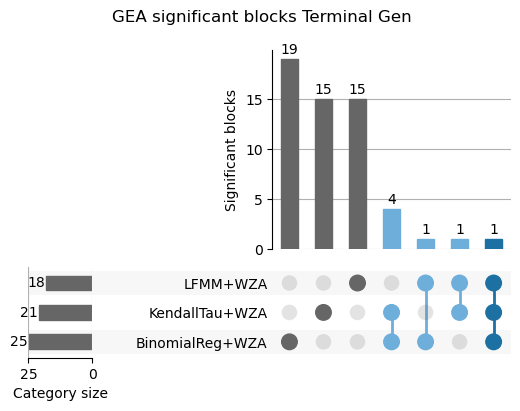

In [52]:
from matplotlib import pyplot as plt

from upsetplot import generate_counts, plot, UpSet

greyscale_colors = ['#666666', '#BBBBBB', '#666666', '#BBBBBB', '#666666', '#BBBBBB']

# Define green tones for significant points (alternating dark and light greens)
green_colors = ['#2aad2a', '#208420'] # 

# Create the UpSet plot using the UpSet class
upset = UpSet(data, facecolor="#666666",show_counts=True)

# Style subsets with specific size

upset.style_subsets(min_degree=19, max_degree=19, facecolor="green")
upset.style_subsets(min_degree=15, max_degree=15, facecolor="purple")
upset.style_subsets(min_degree=11, max_degree=11, facecolor="orange")

upset.style_subsets(min_degree=2, facecolor="#6DAEDB")
upset.style_subsets(min_degree=3, facecolor="#1D70A2")

# Plot the upset plot
plot_result = upset.plot()

plot_result["intersections"].set_ylabel("Significant blocks")
plot_result["totals"].set_xlabel("Category size")
plt.suptitle("GEA significant blocks Terminal Gen")

plt.savefig("gea_significant_blocks_terminal_gen_bh.png",bbox_inches='tight')  # Save as PNG with 300 DPI resolution
plt.savefig("gea_significant_blocks_terminal_gen_bh.svg",bbox_inches='tight')  # Save as PNG with 300 DPI resolution

# Show the plot
plt.show()

In [ ]:
## permutation tests 

In [ ]:
import numpy as np

In [ ]:
# Function to perform permutation test for overlap across all three sets
def permutation_test_3_sets(total1, total2, total3, sig1, sig2, sig3, observed_shared_123, n_permutations=10000):
    overlap_count = 0
    print(total1, total2, total3)
    print(sig1, sig2, sig3)
    print(observed_shared_123)
    # Perform permutations
    for _ in range(n_permutations):
        # Randomly select significant SNPs for each set
        perm_sig1 = np.random.choice(total1, sig1, replace=False)
        perm_sig2 = np.random.choice(total2, sig2, replace=False)
        perm_sig3 = np.random.choice(total3, sig3, replace=False)

        # Find the intersection (shared SNPs) across all three sets
        shared_123 = len(set(perm_sig1) & set(perm_sig2) & set(perm_sig3))

        # Count how many times the shared SNPs meet or exceed the observed value
        if shared_123 >= observed_shared_123:
            overlap_count += 1

    # Calculate empirical p-value
    p_value = overlap_count / n_permutations
    return p_value

In [32]:
# Extract 'block' columns and convert to sets
set1 = set(sign_linages_wza_picmin['block'])
set2 = set(sign_wza_lfmm['block'])
set3 = set(sign_wza_kendall['block'])

In [33]:
permutation_test_3_sets(len(wza_kendall),
                        len(wza_lfmm),
                        len(linages_wza_picmin),
                        len(sign_wza_kendall),
                        len(sign_wza_lfmm),
                        len(sign_linages_wza_picmin),
                        len(set1.intersection(set2).intersection(set3)),
                        1000000
)

NameError: name 'permutation_test_3_sets' is not defined

In [ ]:
# Function to perform permutation test for overlap across all three sets
def permutation_test_2_sets(total1, total2, sig1, sig2, observed_shared_12, n_permutations=10000):
    overlap_count = 0
    print(total1, total2)
    print(sig1, sig2)
    print(observed_shared_12)
    # Perform permutations
    for _ in range(n_permutations):
        # Randomly select significant SNPs for each set
        perm_sig1 = np.random.choice(total1, sig1, replace=False)
        perm_sig2 = np.random.choice(total2, sig2, replace=False)

        # Find the intersection (shared SNPs) across all three sets
        shared_12 = len(set(perm_sig1) & set(perm_sig2))

        # Count how many times the shared SNPs meet or exceed the observed value
        if shared_12 >= observed_shared_12:
            overlap_count += 1

    # Calculate empirical p-value
    p_value = overlap_count / n_permutations
    return p_value

In [ ]:
len(set1.intersection(set2))

In [ ]:
permutation_test_2_sets(len(wza_kendall),
                        len(wza_lfmm),
                        len(sign_wza_kendall),
                        len(sign_wza_lfmm),
                        len(set2.intersection(set3)),
                        1000000
)

In [ ]:
permutation_test_2_sets(len(wza_kendall),
                        len(linages_wza_picmin),
                        len(sign_wza_kendall),
                        len(sign_linages_wza_picmin),
                        len(set1.intersection(set3)),
                        1000000
)

In [ ]:
permutation_test_2_sets(len(wza_lfmm),
                        len(linages_wza_picmin),
                        len(sign_wza_lfmm),
                        len(sign_linages_wza_picmin),
                        len(set1.intersection(set2)),
                        1000000
)

In [28]:
shared_blocks = ['2_1265', '4_801']

In [42]:
selection_atlas = pd.read_csv('../key_files/POP_EVOLUTION_selection_atlas_haplotype_sig_counts.txt',sep='\t')

In [43]:
selection_atlas

,chr,start,end,sig_count
0,1,291,50100,8.0
1,1,50128,50679,5.0
2,1,50754,51298,4.0
3,1,51379,51537,0.0
4,1,51538,51961,4.0
...,...,...,...,...
16912,5,26744719,26745443,0.0
16913,5,26745628,26835506,13.0
16914,5,26835700,26835823,0.0
16915,5,26835839,26973763,13.0


In [44]:
selection_atlas['block'] = selection_atlas['chr'].astype(str) + '_' + selection_atlas['start'].astype(str) 

In [45]:
bb

,chr,start,end,sig_count,block
0,1,291,50100,8.0,1_291
1,1,50128,50679,5.0,1_50128
2,1,50754,51298,4.0,1_50754
3,1,51379,51537,0.0,1_51379
4,1,51538,51961,4.0,1_51538
...,...,...,...,...,...
16912,5,26744719,26745443,0.0,5_26744719
16913,5,26745628,26835506,13.0,5_26745628
16914,5,26835700,26835823,0.0,5_26835700
16915,5,26835839,26973763,13.0,5_26835839


In [50]:
# Create a new column 'chr_rowindex' that combines 'chr' and a zero-based index for each 'chr' group
selection_atlas['chr_rowindex'] = selection_atlas.groupby('chr').cumcount()

# Create an ID that combines 'chr' and the 'chr_rowindex'
selection_atlas['block_id'] = selection_atlas['chr'].astype(str) + "_" + selection_atlas['chr_rowindex'].astype(str)


In [48]:
selection_atlas

,chr,start,end,sig_count,block,chr_rowindex,id
0,1,291,50100,8.0,1_291,0,1_0
1,1,50128,50679,5.0,1_50128,1,1_1
2,1,50754,51298,4.0,1_50754,2,1_2
3,1,51379,51537,0.0,1_51379,3,1_3
4,1,51538,51961,4.0,1_51538,4,1_4
...,...,...,...,...,...,...,...
16912,5,26744719,26745443,0.0,5_26744719,3106,5_3106
16913,5,26745628,26835506,13.0,5_26745628,3107,5_3107
16914,5,26835700,26835823,0.0,5_26835700,3108,5_3108
16915,5,26835839,26973763,13.0,5_26835839,3109,5_3109


In [51]:
selection_atlas[selection_atlas['block_id'].isin(shared_blocks)]

,chr,start,end,sig_count,block,chr_rowindex,id,block_id
6436,2,11533904,11534263,0.0,2_11533904,1265,2_1265,2_1265
11545,4,7255726,7269426,6.0,4_7255726,801,4_801,4_801


In [52]:
dict_blocks['2_1265']

['2_11533904',
 '2_11533924',
 '2_11533937',
 '2_11533944',
 '2_11533991',
 '2_11533994',
 '2_11534005',
 '2_11534015',
 '2_11534022',
 '2_11534023',
 '2_11534030',
 '2_11534048',
 '2_11534063',
 '2_11534092',
 '2_11534094',
 '2_11534099',
 '2_11534102',
 '2_11534143',
 '2_11534161',
 '2_11534165',
 '2_11534224',
 '2_11534244',
 '2_11534263']

In [35]:
selection_atlas

,0,1,2,3,block
0,1,291,7468,1,1_291
1,1,7572,142940,6,1_7572
2,1,142971,143272,0,1_142971
3,1,143366,144872,0,1_143366
4,1,144922,146471,0,1_144922
...,...,...,...,...,...
12104,5,26757463,26758064,0,5_26757463
12105,5,26758076,26759868,0,5_26758076
12106,5,26759901,26795349,6,5_26759901
12107,5,26795383,26884558,7,5_26795383
